In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

queens_gas = pd.read_excel('New_DMU.xlsx', sheet_name='QUENGF01')
queens_elec = pd.read_excel('New_DMU.xlsx', sheet_name='QUENEF')

In [4]:
# Model inputs
train_size = 0.8
lookback = 30

In [5]:
## Formating dataframes
# Create year, month, day, and hour columns as well as daily consumption
queens_gas['Date'] = pd.to_datetime(queens_gas['Date'], format='%Y/%d/%M')
queens_gas['Year'] = queens_gas['Date'].dt.year
queens_gas['Month'] = queens_gas['Date'].dt.month
queens_gas['Day'] = queens_gas['Date'].dt.day
queens_gas.index = pd.to_datetime(queens_gas.index)
#queens_gas.drop(['Date'], axis=1, inplace=True)


queens_elec['Date'] = pd.to_datetime(queens_elec['Date'], format='%Y/%d/%M')
queens_elec['Year'] = queens_elec['Date'].dt.year
queens_elec['Month'] = queens_elec['Date'].dt.month
queens_elec['Day'] = queens_elec['Date'].dt.day
#queens_elec.drop(['Date'], axis=1, inplace=True)


In [6]:
queens_gas['Daily consumption'] = queens_gas.iloc[:, 1:-3].sum(axis=1)
queens_elec['Daily consumption'] = queens_elec.iloc[:, 1:-3].sum(axis=1)


In [7]:
queens_gas.head()

,Date,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,1900-01-01 00:00:00,Year,Month,Day,Daily consumption
1970-01-01 00:00:00.000000000,2016-01-09,198.787,208.253,173.544,173.544,148.301,160.922,186.165,179.855,173.544,...,107.282,113.592,145.146,116.748,110.437,107.282,2016,1,9,6765.058
1970-01-01 00:00:00.000000001,2016-01-10,110.437,107.282,110.437,116.748,217.719,186.165,160.922,179.855,170.388,...,176.699,145.146,129.369,145.146,173.544,135.680,2016,1,10,6825.006
1970-01-01 00:00:00.000000002,2016-01-11,138.835,132.524,138.835,135.680,123.058,129.369,157.767,145.146,154.612,...,208.253,157.767,148.301,151.456,192.476,164.078,2016,1,11,7408.742
1970-01-01 00:00:00.000000003,2016-01-12,151.456,154.612,157.767,183.010,179.855,192.476,179.855,176.699,179.855,...,160.922,135.680,132.524,148.301,179.855,167.233,2016,1,12,7200.491
1970-01-01 00:00:00.000000004,2016-01-13,138.835,145.146,167.233,151.456,153.034,153.034,167.233,170.388,167.233,...,135.680,129.369,157.767,164.078,138.835,141.990,2016,1,13,7200.489


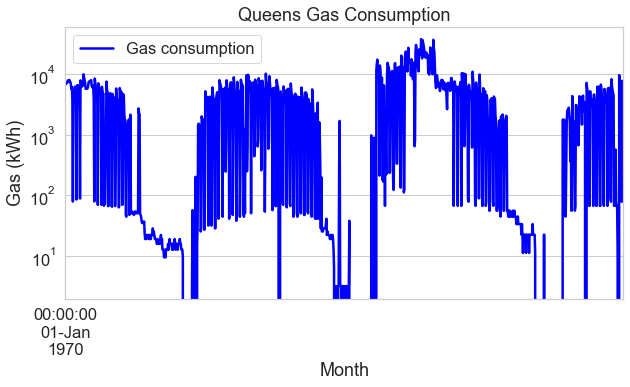

In [8]:
## Visualizing data
# Plotting gas consumption
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
queens_gas.reset_index().plot(x='index', y='Daily consumption', kind='line', color='blue', label='Gas consumption', figsize=(10, 5))
plt.title('Queens Gas Consumption')
plt.xlabel('Month')
plt.ylabel('Gas (kWh)')
plt.yscale('log')
plt.show()

In [9]:
queens_gas['Daily consumption'][queens_gas['Daily consumption'] < 50] = 50

C:\Users\Farshad\AppData\Local\Temp\ipykernel_19552\3939253930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens_gas['Daily consumption'][queens_gas['Daily consumption'] < 50] = 50


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

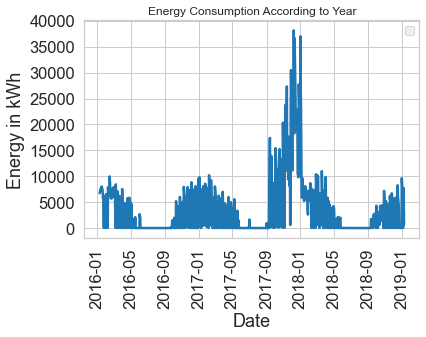

In [10]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=queens_gas["Date"], y=queens_gas["Daily consumption"], data=queens_gas)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Daily Gas Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in kWh")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

c:\Users\Farshad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

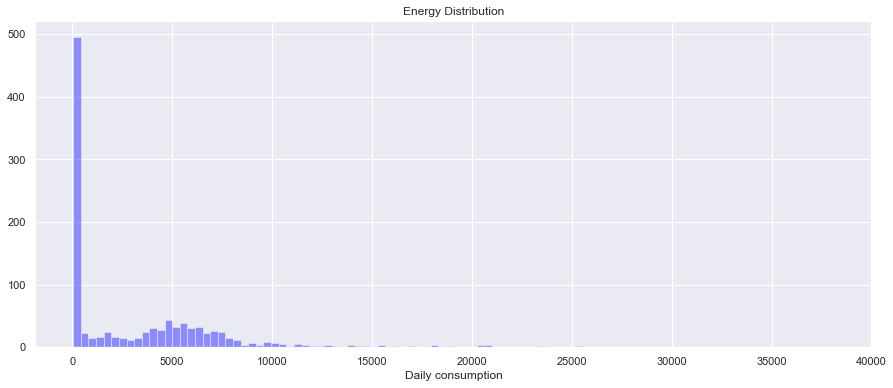

In [11]:
sns.distplot(queens_gas["Daily consumption"], bins=100, kde=False, color='blue')
plt.title("Energy Distribution")

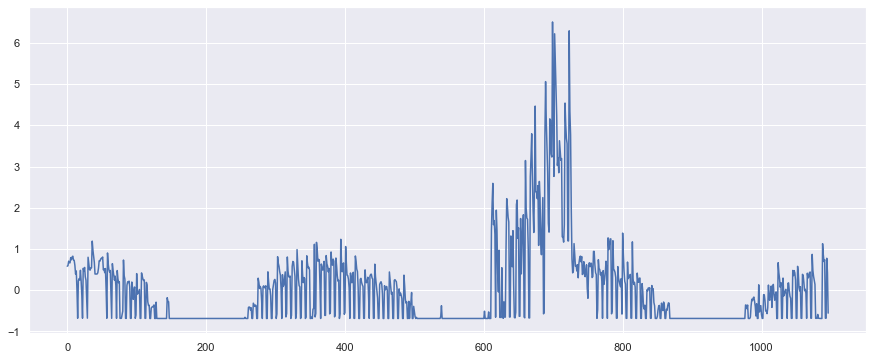

In [12]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
daily_consumption = queens_gas["Daily consumption"]
num_train = int(train_size * len(daily_consumption))
daily_consumption_scaled = sc_X.fit_transform(daily_consumption.values.reshape(-1,1))
plt.plot(daily_consumption_scaled)
TestData = daily_consumption_scaled[num_train:]
Training_Set = daily_consumption_scaled[0:num_train]

In [13]:
# from sklearn.preprocessing import MinMaxScaler
# Training_Set = Training_Set.values
# Training_Set.reshape(1,-1)
# sc = MinMaxScaler(feature_range=(0, 1))
# Train = sc.fit_transform(Training_Set)
# X_Train = np.reshape(Training_Set, newshape=(Training_Set.shape[0], Training_Set.shape[1], 1))
# X_Train.shape
def create_rnn_dataset(data, lookback=1):
    
    data_x, data_y = [], []
    for i in range(len(data)- lookback -1):
            #All points from this point, looking backwards upto lookback
            a = data[i:(i+ lookback), 0]
            data_x.append(a)
            #The next point
            data_y.append(data[i + lookback, 0])
    return np.array(data_x), np.array(data_y)

X_Train, Y_Train = create_rnn_dataset(Training_Set, lookback=lookback)

In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], 1, X_Train.shape[1]))
X_Train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import tensorflow as tf

tf.random.set_seed(3)

#Create a Keras Model
ts_model=Sequential()
#Add LSTM
ts_model.add(LSTM(256, input_shape=(1,lookback)))
ts_model.add(Dense(1))

#Compile with Adam Optimizer. Optimize for minimum mean square error
ts_model.compile(loss="mean_squared_error",
                 optimizer="adam",
                 metrics=["mse"])

#Print model summary
ts_model.summary()

#Train the model
ts_model.fit(X_Train, Y_Train, 
             epochs=10, batch_size=1, verbose=1)

In [ ]:
#Preprocess the test dataset, the same way training set is processed
test_req_x, test_req_y = create_rnn_dataset(TestData,lookback)
test_req_x = np.reshape(test_req_x, 
                         (test_req_x.shape[0],1, test_req_x.shape[1]))

#Evaluate the model
ts_model.evaluate(test_req_x, test_req_y, verbose=1)

#Predict for the training dataset
predict_on_train= ts_model.predict(X_Train)
#Predict on the test dataset
predict_on_test = ts_model.predict(test_req_x)

#Inverse the scaling to view results
predict_on_train = sc_X.inverse_transform(predict_on_train)
predict_on_test = sc_X.inverse_transform(predict_on_test)
